In [ ]:

import h5py
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

filename = '/content/drive/MyDrive/loadwalks.py'
exec(open(filename).read())

filename = '/content/drive/MyDrive/confidenceintervals.py'
exec(open(filename).read())

path1 = '/content/drive/My Drive/CapstoneWalks/Corner7x7Encoded150Dim_1250Steps_Walks.h5'
path2 = '/content/drive/My Drive/CapstoneWalks/Corner7x7Encoded150Dim_1250Steps_Walks_Test.h5'



path3 = '/content/drive/My Drive/CapstoneWalks/Corner150Dim_1250Steps_Targets.h5'
path4 = '/content/drive/My Drive/CapstoneWalks/Corner150Dim_1250Steps_Targets_Test.h5'

Walks_Training = read_one_hdf5(path1)
Walks_Testing = read_one_hdf5(path2)
Walk_Targets = read_one_hdf5(path3)
Walk_Targets_Test = read_one_hdf5(path4)

Completed
Completed
Completed
Completed


In [2]:
from keras.layers import Input
#Using grayscale images
in_channel = 1
num_targets = 4
img_rows, img_cols = 7, 7

input_shape = (img_rows, img_cols, in_channel)

input_img = Input(shape = input_shape)

In [3]:
Walks_Training.shape

NameError: ignored

In [4]:
import keras
from keras.layers import Input, Dense, Flatten, Dropout, Conv2D, MaxPooling2D, Activation, concatenate
from keras.layers.advanced_activations import ReLU
from keras.models import Model




def create_sub_graph_CNN(input_img):
  model = Conv2D(32, (3, 3), padding='same')(input_img)
  model = ReLU()(model)
  model = MaxPooling2D((2, 2),padding='same')(model)

  model = Conv2D(64, (3, 3), padding='same')(model)
  model = ReLU()(model)
  model = MaxPooling2D(pool_size=(2, 2),padding='same')(model)
    
  model = Conv2D(32, (3, 3), padding='same')(model)
  model = ReLU()(model)
  model = MaxPooling2D(pool_size=(2, 2),padding='same')(model)
  
  model = Flatten()(model)
  return model


In [5]:
#Create input and model framework for Rand Walks models

xSmall_input = Input(shape=input_shape)

walks_model0 = create_sub_graph_CNN(xSmall_input)
walks_model1 =create_sub_graph_CNN(xSmall_input)
walks_model2 = create_sub_graph_CNN(xSmall_input)
walks_model3 = create_sub_graph_CNN(xSmall_input)

walks_model4 = create_sub_graph_CNN(xSmall_input)
walks_model5 = create_sub_graph_CNN(xSmall_input)
walks_model6 = create_sub_graph_CNN(xSmall_input)
walks_model7 = create_sub_graph_CNN(xSmall_input)

walks_model8 = create_sub_graph_CNN(xSmall_input)
walks_model9 =create_sub_graph_CNN(xSmall_input)
walks_model10 = create_sub_graph_CNN(xSmall_input)
walks_model11 = create_sub_graph_CNN(xSmall_input)

modelsCNN = [walks_model0,walks_model1,walks_model2,walks_model3,walks_model4,walks_model5,walks_model6,walks_model7,walks_model8,walks_model9,walks_model10,walks_model11]         


In [ ]:
from keras.utils.vis_utils import plot_model
from keras import optimizers
import tensorflow as tf

output = Dense(num_targets, activation='sigmoid', use_bias = True)(walks_model0)


PACE = tf.keras.models.Model(xSmall_input, output, name="PACE")


PACE.compile(loss=tf.keras.losses.LogCosh(), optimizer=tf.keras.optimizers.Adam(lr=0.0005), metrics= ['mse'])


plot_model(PACE, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [7]:
from keras import optimizers
import tensorflow as tf

#Combine results from both models into a larger 2D matrix
combined = concatenate([model for model in modelsCNN])

#Flatten creates a resized vector to be fed into final prediction
combined = Flatten()(combined)
#combined = Dropout(.5)(combined)

output = Dense(num_targets, activation='sigmoid', use_bias = True)(combined)


PACE = tf.keras.models.Model(xSmall_input, output, name="PACE")


PACE.compile(loss=tf.keras.losses.LogCosh(), optimizer=tf.keras.optimizers.Adam(lr=0.0005), metrics= ['mse'])


In [8]:
PACE.summary()

Model: "PACE"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 7, 7, 1)]    0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 7, 7, 32)     320         input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 7, 7, 32)     320         input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_6 (Conv2D)               (None, 7, 7, 32)     320         input_2[0][0]                    
_______________________________________________________________________________________________

In [ ]:
PACE.fit(Walks_Training, Walk_Targets, epochs=15, batch_size= 32,
       shuffle=True, validation_data=(Walks_Testing, Walk_Targets_Test))

Epoch 1/15
1875/1875 [==============================] - 50s 17ms/step - loss: 0.0077 - mse: 0.0155 - val_loss: 0.0040 - val_mse: 0.0080
Epoch 2/15
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0038 - mse: 0.0077 - val_loss: 0.0037 - val_mse: 0.0075
Epoch 3/15
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0037 - mse: 0.0074 - val_loss: 0.0036 - val_mse: 0.0072
Epoch 4/15
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0036 - mse: 0.0072 - val_loss: 0.0036 - val_mse: 0.0072
Epoch 5/15
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0035 - mse: 0.0071 - val_loss: 0.0036 - val_mse: 0.0071
Epoch 6/15
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0034 - mse: 0.0069 - val_loss: 0.0035 - val_mse: 0.0069
Epoch 7/15
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0034 - mse: 0.0068 - val_loss: 0.0034 - val_mse: 0.0068
Epoch 8/15
1875/1875 [==========================

In [ ]:
PACE.save('/content/drive/MyDrive/CapstoneWalks/BestModelWeights/Corner7x7PACE')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/CapstoneWalks/BestModelWeights/Corner7x7PACE/assets


In [ ]:
path_New1 = '/content/drive/MyDrive/CapstoneWalks/7x7Encoded150Dim_1250Steps_Walks_Test.h5'
path_New2 = '/content/drive/MyDrive/CapstoneWalks/150Dim_75Steps_Targets_Test.h5'


new_data_walks = read_one_hdf5(path_New1)
new_data_targets = read_one_hdf5(path_New2)

Completed
Completed


In [ ]:
new_Model = keras.models.load_model('/content/drive/MyDrive/CapstoneWalks/BestModelWeights/Corner7x7PACE')


In [ ]:

def RMSE(arr1,arr2):

  r = (arr1-arr2)**2

  r = r.sum()/(4*numWalks)  #Scale down the walks to calculate mean square error

  r = r**.5 #Calculate RMSE for entire model

  return r

In [ ]:
new_Predictions = new_Model.predict(new_data_walks)
preds = PACE.predict(Walks_Testing)
numWalks = 10000

print("Predictions of trained data: ", RMSE(preds,Walk_Targets_Test))
print("Predictions of new data: ", RMSE(new_Predictions,new_data_targets))

Predictions of trained data:  0.07984200373044494
Predictions of new data:  0.46319597655345895


'our mean lies in the interval ]1.0058, 1.0071['

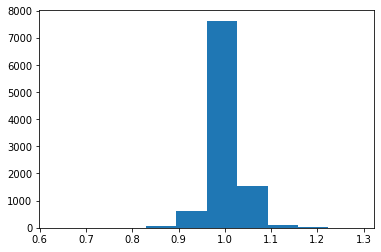

In [ ]:
preds = PACE.predict(Walks_Testing)

sums = [sum(array) for array in preds]
plt.hist(sums)
sum(sums)/len(sums)
report_confidence_interval(confidence_interval(sums, confidence=0.95))

In [ ]:
PACE.summary()